In [12]:
pwd

'/Users/srikanthbhadragiri/Datamites/datasets'

In [95]:
cd datasets

/Users/srikanthbhadragiri/Datamites/datasets


In [96]:
ls

Hospitals count in India - Statewise.csv


In [97]:
cd ..

/Users/srikanthbhadragiri/Datamites


In [98]:
ls

Creating New Columns.ipynb  matplotlib.ipynb
Practice - input.ipynb      missing values 2.ipynb
Python - 01.ipynb           missing values.ipynb
Python - 02.ipynb           mtcars.csv
adult.data                  mtcars_missing_data.csv
adult.names                 numpy.ipynb
adultData.ipynb             pandas.ipynb
datasets/                   pandas3.ipynb
hospitals-count.ipynb       piechart.jpg


In [15]:
import pandas as pd

In [313]:
df = pd.read_csv('./datasets/Hospitals count in India - Statewise.csv')

In [279]:
df.shape

(37, 4)

In [399]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector          object
Number of hospitals in private sector         object
Total number of hospitals (public+private)    object
dtype: object

In [400]:
df

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26
5,Andaman Nicobar Islands,30,6,36
6,Manipur,30,8,38
7,Sikkim,33,8,41
8,Nagaland,36,13,49
9,Goa,43,22,65


In [186]:
df.describe()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
count,37,36,36,36
unique,37,34,31,35
top,Kerala,9,6,13
freq,1,2,3,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   States/UTs                                  37 non-null     object
 1   Number of hospitals in public sector        36 non-null     object
 2   Number of hospitals in private sector       36 non-null     object
 3   Total number of hospitals (public+private)  36 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


- Dataset consists of 4 columns and 37 rows of data
- Data represents various states/UTs, the count of hospitals in private, public sectors and Total count of hostitals

- What to infer?
    - which states/UTs has more number of hospitals.
        - Show a pie chart
        - Show a bar chart
    - which states/UTs has more number of private hospitals when compared with public hospitals.
        - Show in a stacked bar chart
    - 

-- Get the population index of each state/ut and compare which states/uts population with number of hospitals.

- cleanup
    - How many unique states/UTs 
    - Find any null values in hospital counts
    - what could be done to fill them up

In [38]:
uniqueStates = df['States/UTs'].unique()

In [44]:
df.isnull().values.any()

True

In [47]:
df.isnull()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [318]:
# Get list of all rows where we have null values in any columns

df[df['Number of hospitals in public sector'].isna() | 
   df['Number of hospitals in private sector'].isna() | 
   df['Total number of hospitals (public+private)'].isna()]

# *** Is there a better way to get this - 
#     mentioning all column names is not a viable option with datasets which have many column names. 

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
36,Ladakh,NaN,NaN,NaN


### Inference:
    1. There is one row, with null values for all of the 3 columns. I feel its better delete the row.

In [398]:
# Drop a row from DataFrame based on index
df.drop([36], inplace=True)

In [401]:
# Code to replace 'comma' from values of three columns.
df['Number of hospitals in public sector'] = df['Number of hospitals in public sector'].str.replace(',', '')
df['Number of hospitals in private sector'] = df['Number of hospitals in private sector'].str.replace(',', '')
df['Total number of hospitals (public+private)'] = df['Total number of hospitals (public+private)'].str.replace(',', '')

In [403]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector          object
Number of hospitals in private sector         object
Total number of hospitals (public+private)    object
dtype: object

In [404]:
# convert three column datatype from str into int
df['Number of hospitals in public sector'] = df['Number of hospitals in public sector'].astype(int)
df['Number of hospitals in private sector'] = df['Number of hospitals in private sector'].astype(int)
df['Total number of hospitals (public+private)'] = df['Total number of hospitals (public+private)'].astype(int)

In [405]:
df

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26
5,Andaman Nicobar Islands,30,6,36
6,Manipur,30,8,38
7,Sikkim,33,8,41
8,Nagaland,36,13,49
9,Goa,43,22,65


In [406]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector           int64
Number of hospitals in private sector          int64
Total number of hospitals (public+private)     int64
dtype: object

    - which states/UTs has more number of hospitals.
        - Show a pie chart
        - Show a bar chart

In [407]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [408]:
rcParams['figure.figsize'] = 10,8

In [327]:
# Show top 5 states/UT's with largest number of hospitals (both public and private)
sorted_df = df.sort_values('Total number of hospitals (public+private)', ascending=False)
sorted_df

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
35,Uttar Pradesh,4635,12468,17103
34,Karnataka,2842,7842,10684
33,Rajasthan,2850,2794,5644
32,Telangana,863,3247,4110
31,Kerala,1280,2062,3342
30,Maharashtra,711,2492,3203
29,Bihar,1147,1887,3034
28,Odisha,1806,695,2501
27,Tamil Nadu,1217,1222,2439
26,Punjab,682,1638,2320


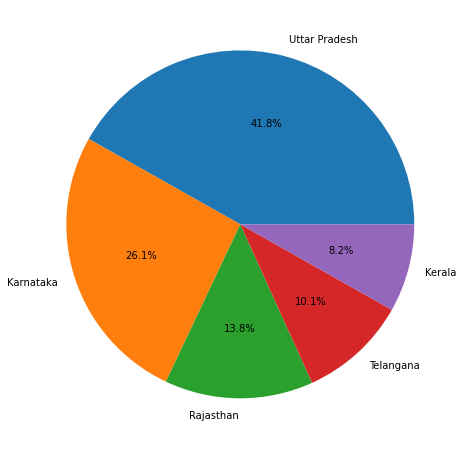

In [412]:
# Display Top 5 states with hightest number of hospitals 
stateNames = sorted_df['States/UTs'].head()
plt.pie(sorted_df['Total number of hospitals (public+private)'].head(),
        labels=stateNames, autopct="%1.1f%%") #%1.1f%%
plt.title="Top 5 states with hightest number of hospitals"
plt.show()

In [414]:
# Extract 3 columns of data (states, public hospitals, private hospitals) to show comparision
df_private_vs_public = sorted_df[['States/UTs',
                                  'Number of hospitals in public sector',
                                  'Number of hospitals in private sector']]
# Reset index values
df_private_vs_public.reset_index(drop=True)

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector
0,Uttar Pradesh,4635,12468
1,Karnataka,2842,7842
2,Rajasthan,2850,2794
3,Telangana,863,3247
4,Kerala,1280,2062
5,Maharashtra,711,2492
6,Bihar,1147,1887
7,Odisha,1806,695
8,Tamil Nadu,1217,1222
9,Punjab,682,1638


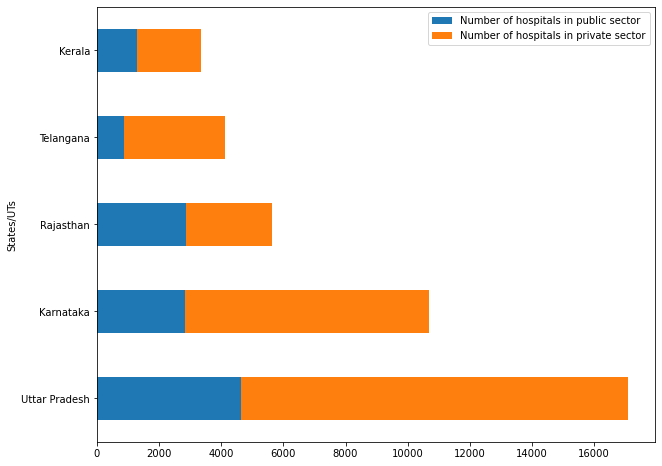

In [410]:
# Draw a stacked bar chart to display the data of top 5 states and compare the ratio of public vs private hospitals
df_private_vs_public.head().plot(kind='barh', stacked=True, x="States/UTs")
plt.show()

TypeError: plot got an unexpected keyword argument 'x'

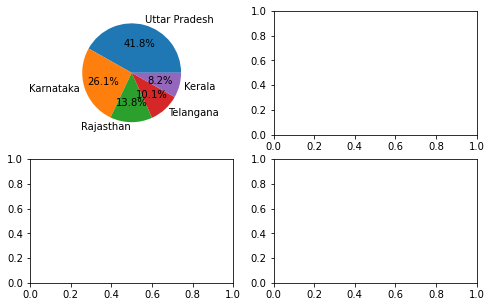

In [393]:
fig, ax = plt.subplots(2,2) # 2 Row, 2 Columns
# can't we mention subplots with 1 row and 2 columns?
ax[0,0].pie(sorted_df['Total number of hospitals (public+private)'].head(),labels=stateNames, autopct="%1.1f%%")
ax[0,1].plot(kind='barh', stacked=True, x="States/UTs")
plt.show()